In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Dataset

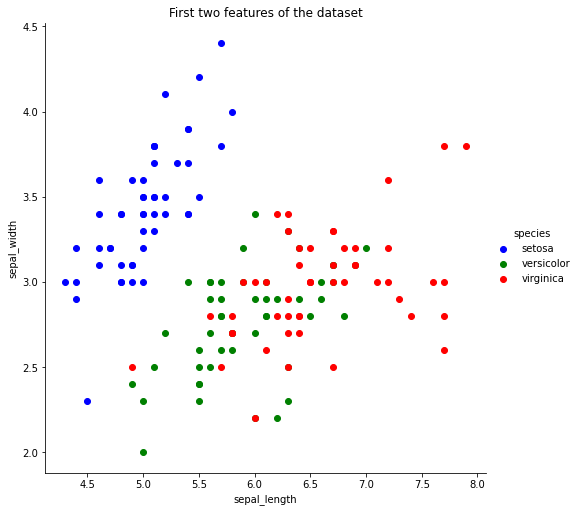

In [ ]:
#Loading the dataset
iris = sns.load_dataset("iris")  # Learn more about Iris dataset here: https://archive.ics.uci.edu/ml/datasets/iris

#Scatter plot of sepal length vs sepal width
sns.FacetGrid(iris, hue="species", height=7, palette = ['blue','green','red']).map(plt.scatter,"sepal_length", "sepal_width", ).add_legend()
plt.title('First two features of the dataset')
df1 = iris[["sepal_length", "sepal_width",'species']]   # for simplicity of visualization we will only use these two features (instead of all 4)

# Visualization and Data Setup

In [ ]:
## boundry visualization taken from https://xavierbourretsicotte.github.io/Naive_Bayes_Classifier.html (with some modification)
def plot_boundry(sklearn_model,resolution = 150):
  # Our 2-dimensional classifier will be over variables X and Y
  N = resolution
  X = np.linspace(4, 8, N)
  Y = np.linspace(1.5, 5, N)
  X, Y = np.meshgrid(X, Y)

  # color_list = ['Blues','Greens','Reds']
  # my_norm = colors.Normalize(vmin=-1.,vmax=1.)
  
  g = sns.FacetGrid(iris, hue="species", height=10, palette = ['blue','green','red']).map(plt.scatter, "sepal_length", "sepal_width",).add_legend()
  my_ax = g.ax
  
  #Computing the predicted class function for each value on the grid
  zz = np.array([sklearn_model.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y))])
  
  #Reshaping the predicted class into the meshgrid shape
  Z = zz.reshape(X.shape)
  
  #Plot the filled and boundary contours
  my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
  my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))
  
  # Addd axis and title
  my_ax.set_xlabel('Sepal length')
  my_ax.set_ylabel('Sepal width')
  my_ax.set_title('Decision boundaries of the used model')
  
  plt.show()

In [ ]:
def select_data(df_x, df_y, num_per_class = 1):
  # Selects data from the input dataframe uniformly. This means that we have the same number of examples for each of our 3 classes
  inds = df_y.index[df_y ==0][:num_per_class].tolist() + df_y.index[df_y ==1][:num_per_class].tolist() + df_y.index[df_y ==2][:num_per_class].tolist()
  return df_x.loc[inds,:], df_y[inds]

In [ ]:
#Setup X and y data
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

X_data = shuffle(X_data, random_state = 72)
y_labels = shuffle(y_labels, random_state = 72)

# Training

In [ ]:
plot_DB = True # If True, the decision boundry of both models are plotted during training

Training using  3  examples
NB Accuracy over the datset:  0.78
NB Decision Boundry: 


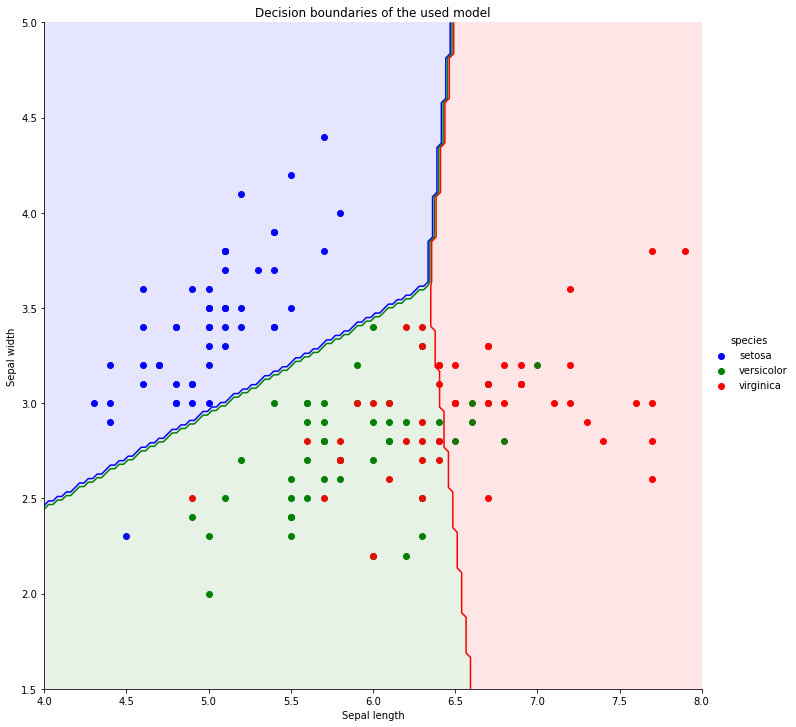

LR Accuracy over the datset:  0.7
LR Decision Boundry: 


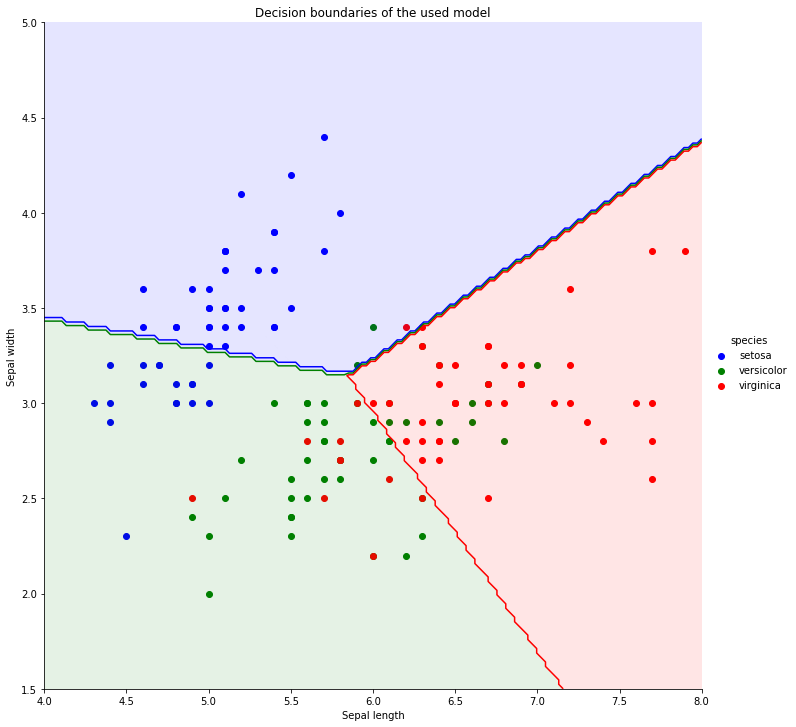

##################
Training using  9  examples
NB Accuracy over the datset:  0.7866666666666666
NB Decision Boundry: 


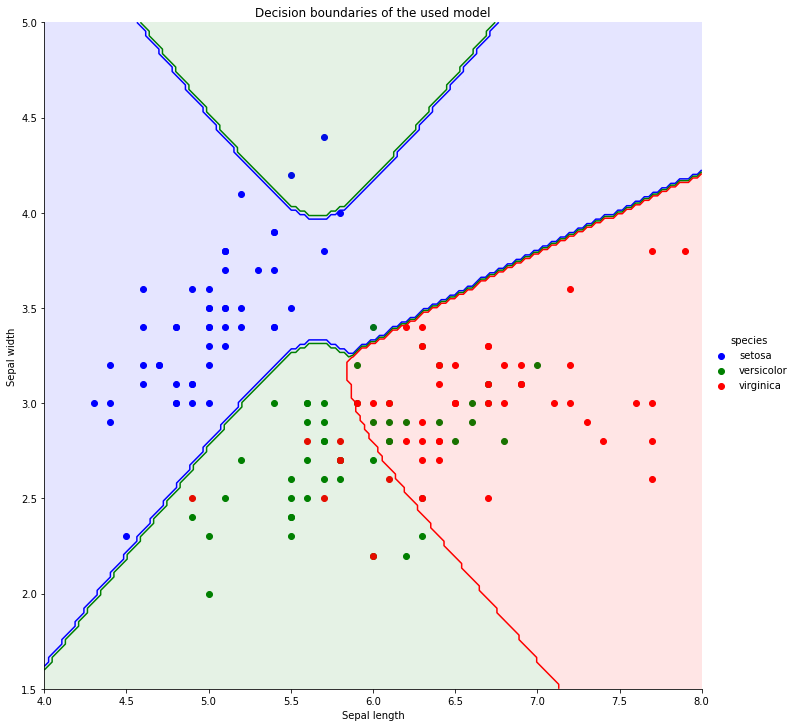

LR Accuracy over the datset:  0.66
LR Decision Boundry: 


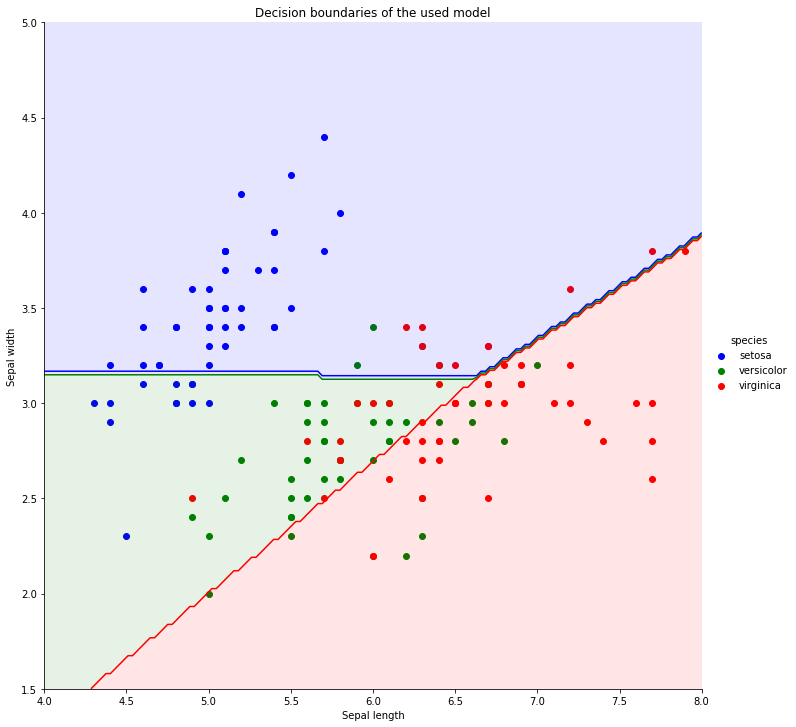

##################
Training using  12  examples
NB Accuracy over the datset:  0.7933333333333333
NB Decision Boundry: 


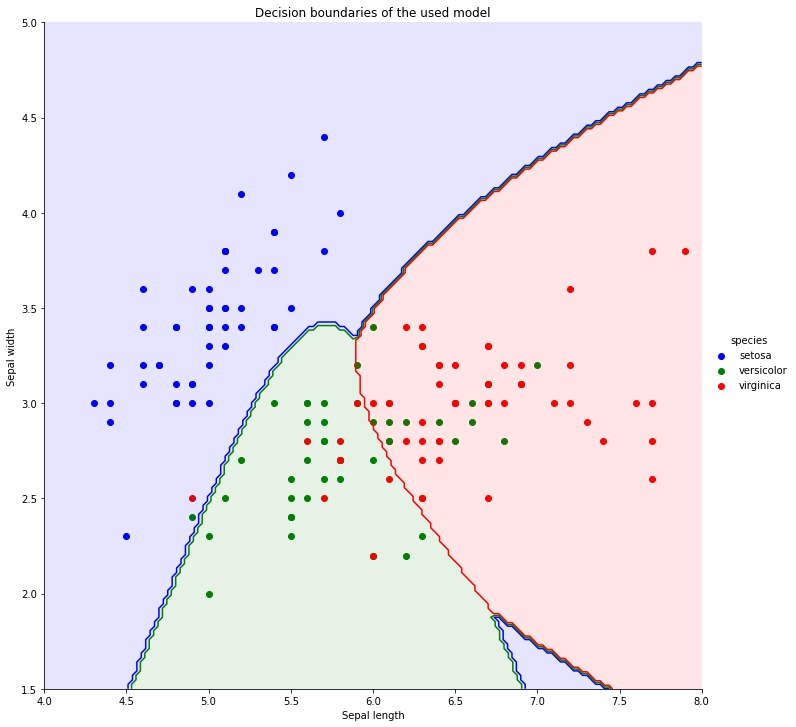

LR Accuracy over the datset:  0.7333333333333333
LR Decision Boundry: 


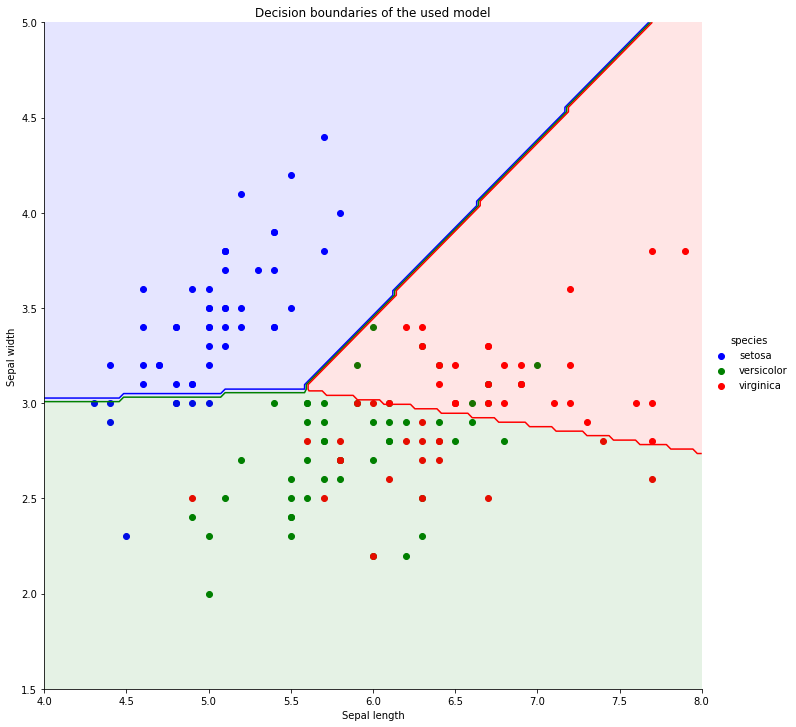

##################
Training using  24  examples
NB Accuracy over the datset:  0.7733333333333333
NB Decision Boundry: 


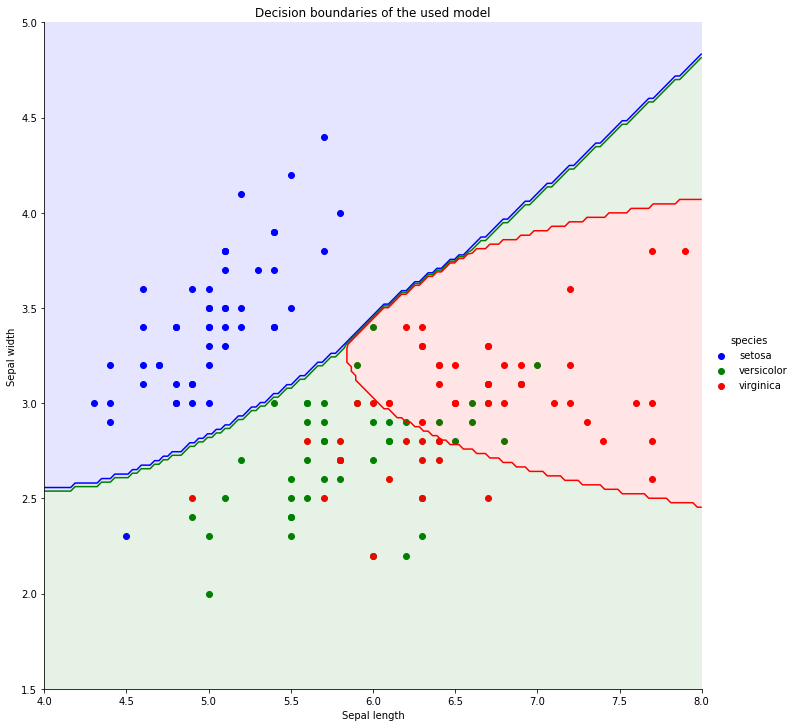

LR Accuracy over the datset:  0.7733333333333333
LR Decision Boundry: 


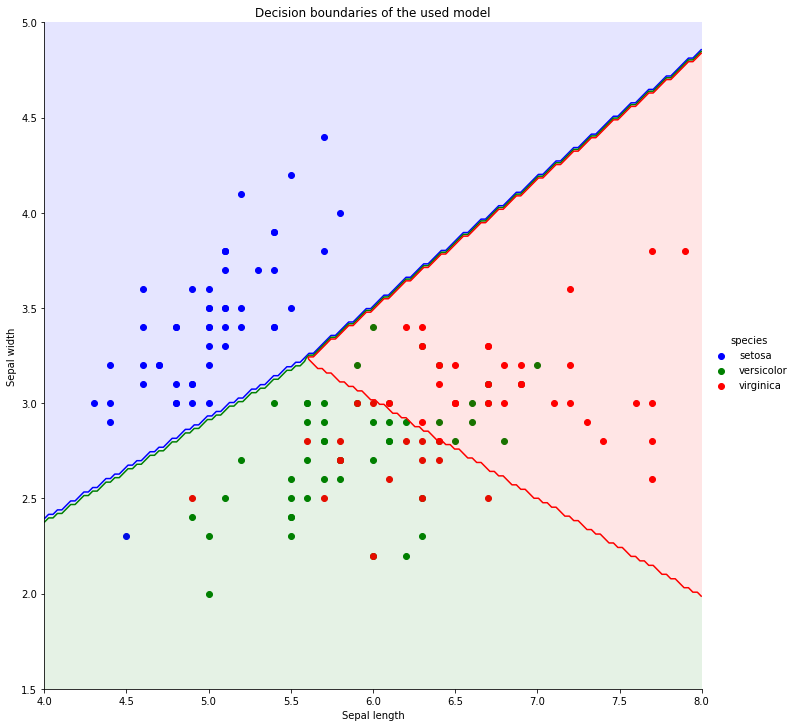

##################
Training using  36  examples
NB Accuracy over the datset:  0.78
NB Decision Boundry: 


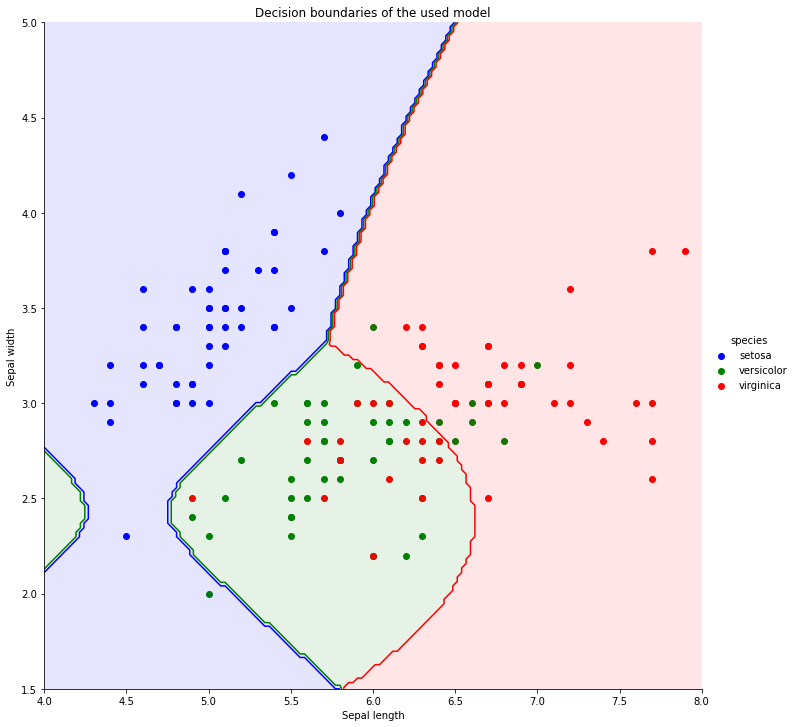

LR Accuracy over the datset:  0.78
LR Decision Boundry: 


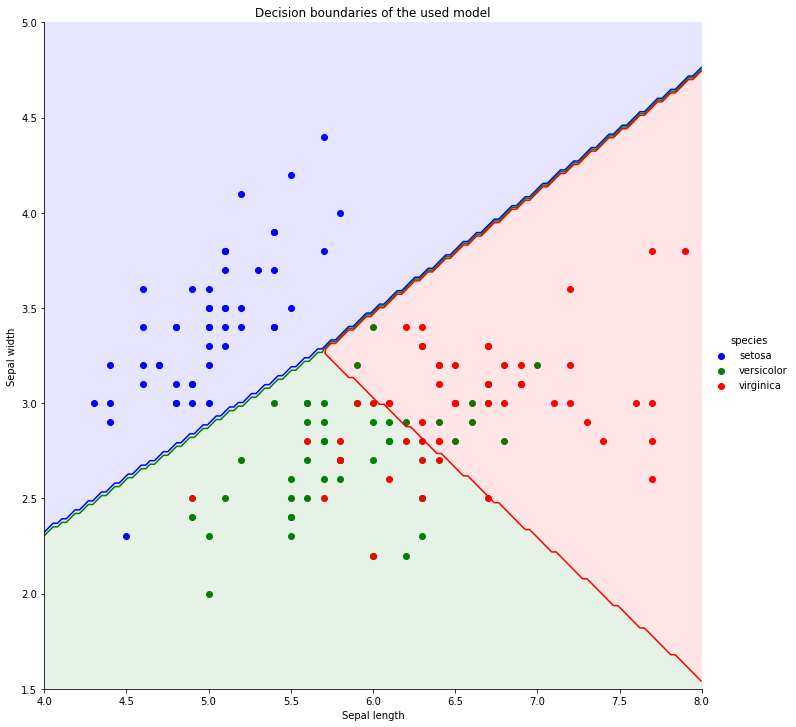

##################
Training using  48  examples
NB Accuracy over the datset:  0.76
NB Decision Boundry: 


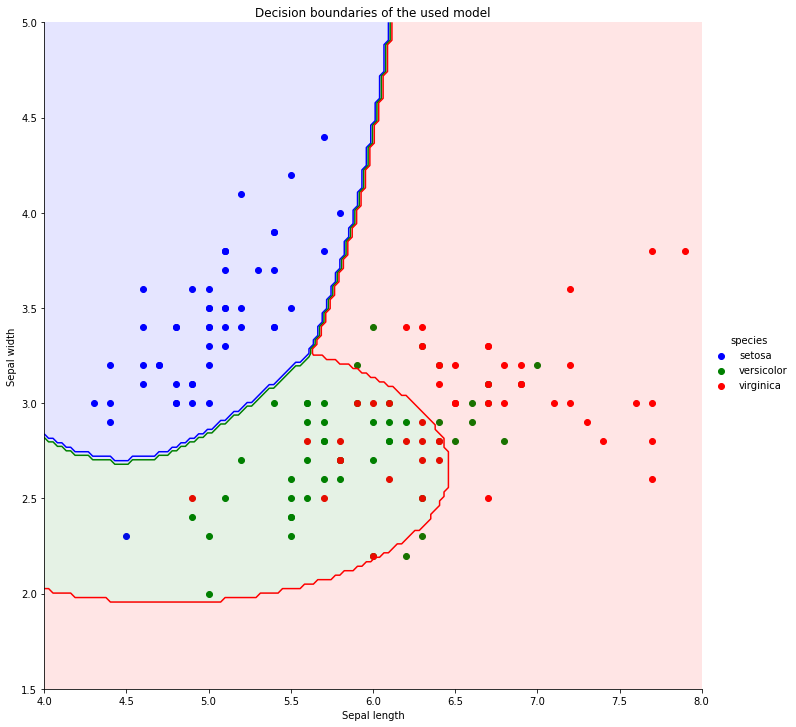

LR Accuracy over the datset:  0.8
LR Decision Boundry: 


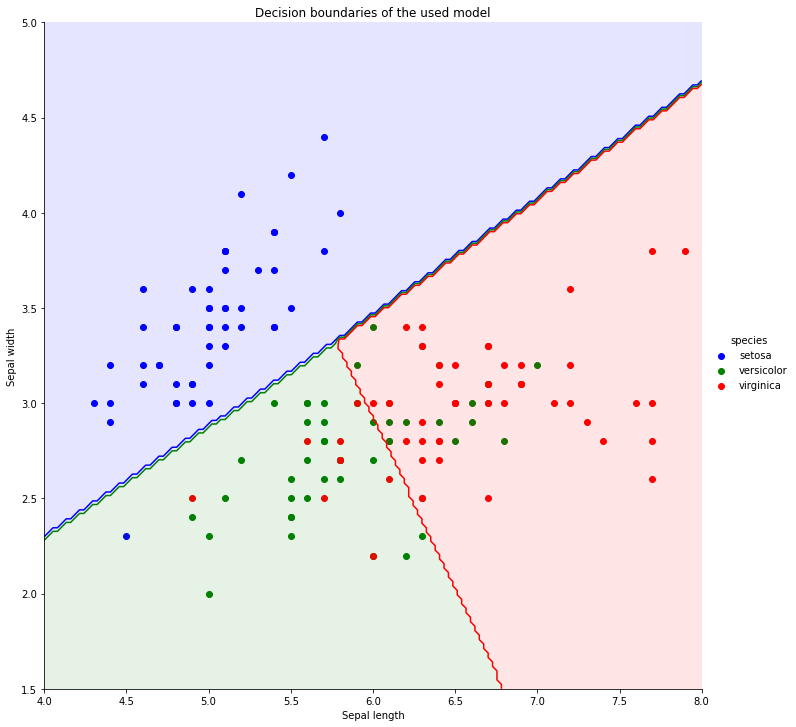

##################
Training using  60  examples
NB Accuracy over the datset:  0.7733333333333333
NB Decision Boundry: 


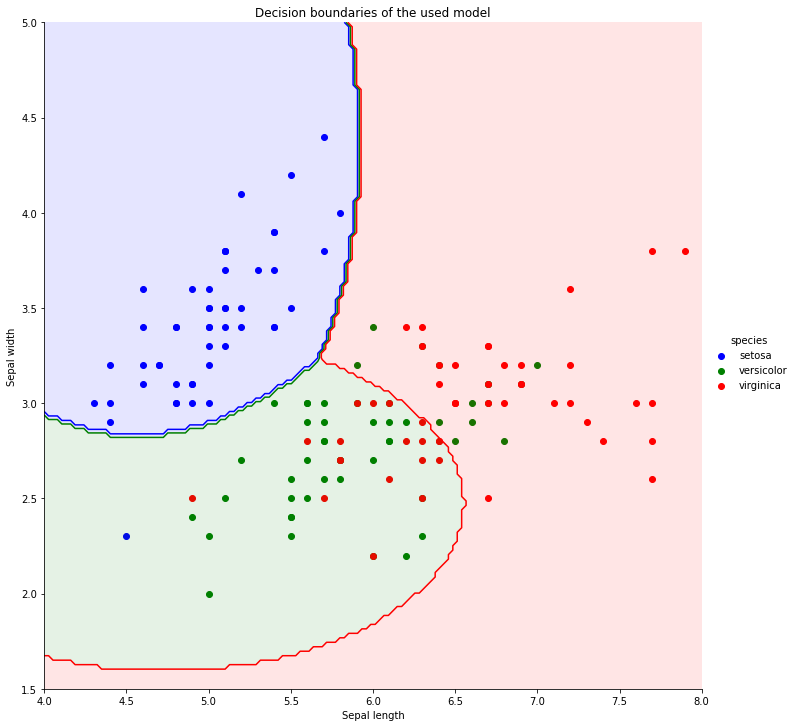

LR Accuracy over the datset:  0.8133333333333334
LR Decision Boundry: 


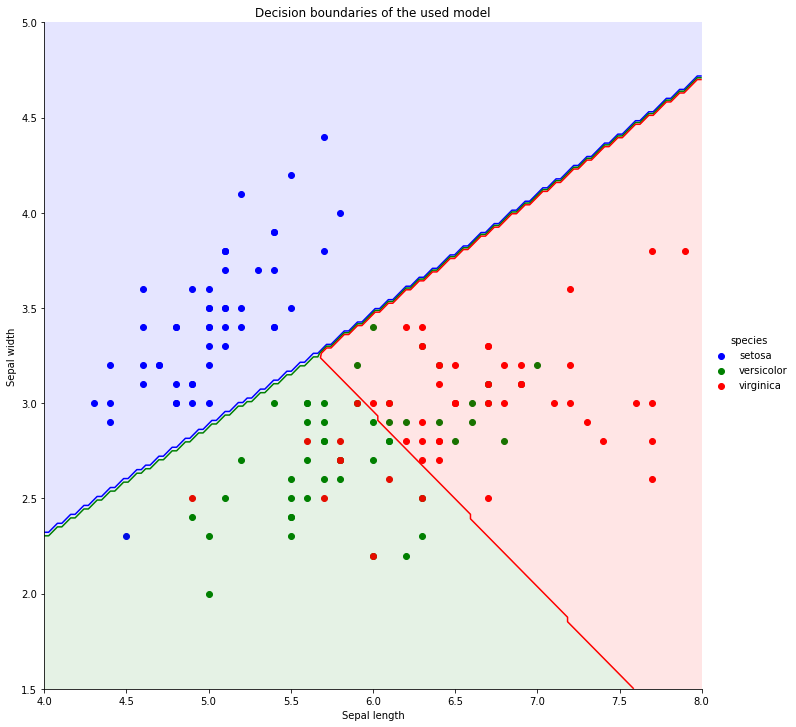

##################
Training using  72  examples
NB Accuracy over the datset:  0.7933333333333333
NB Decision Boundry: 


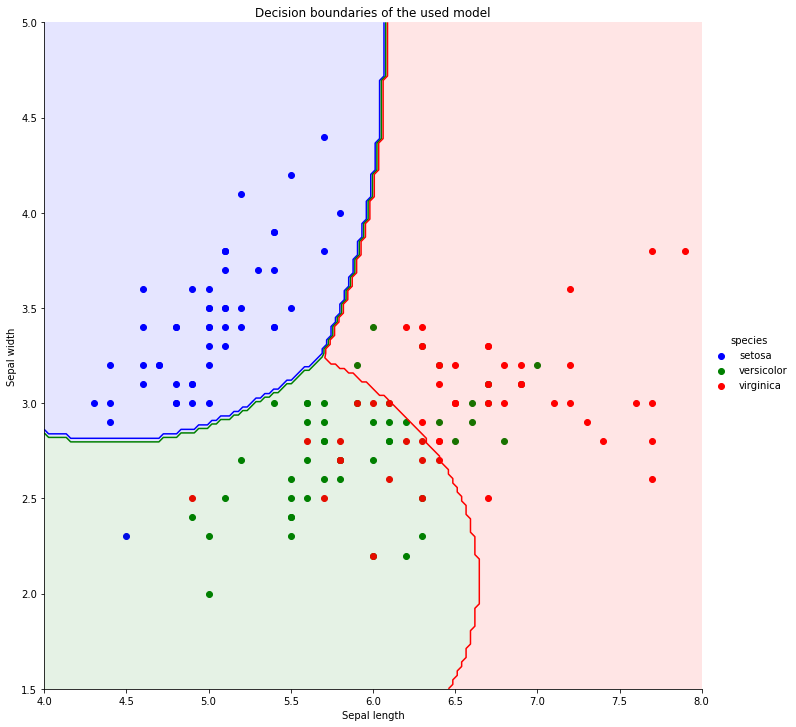

LR Accuracy over the datset:  0.8133333333333334
LR Decision Boundry: 


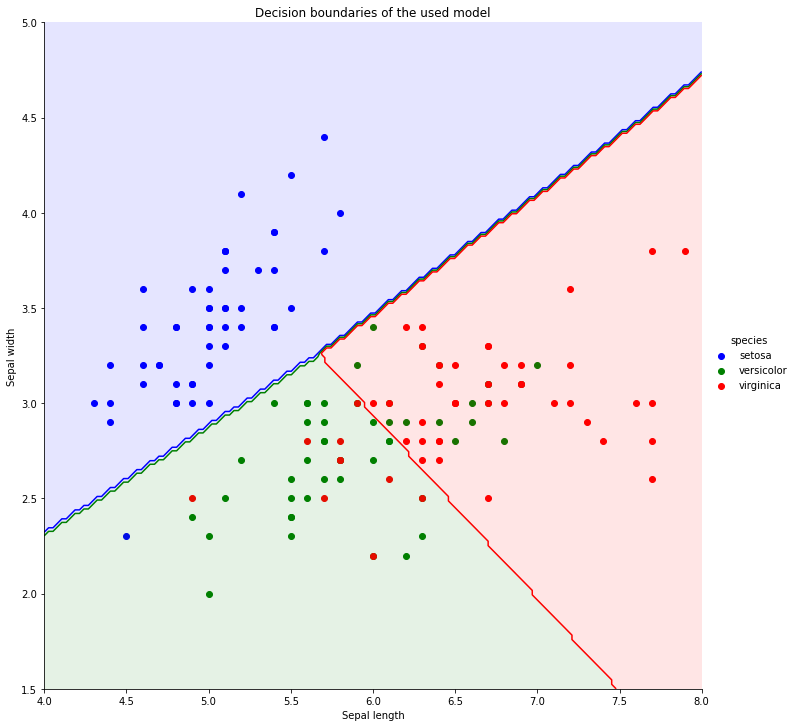

##################
Training using  84  examples
NB Accuracy over the datset:  0.7933333333333333
NB Decision Boundry: 


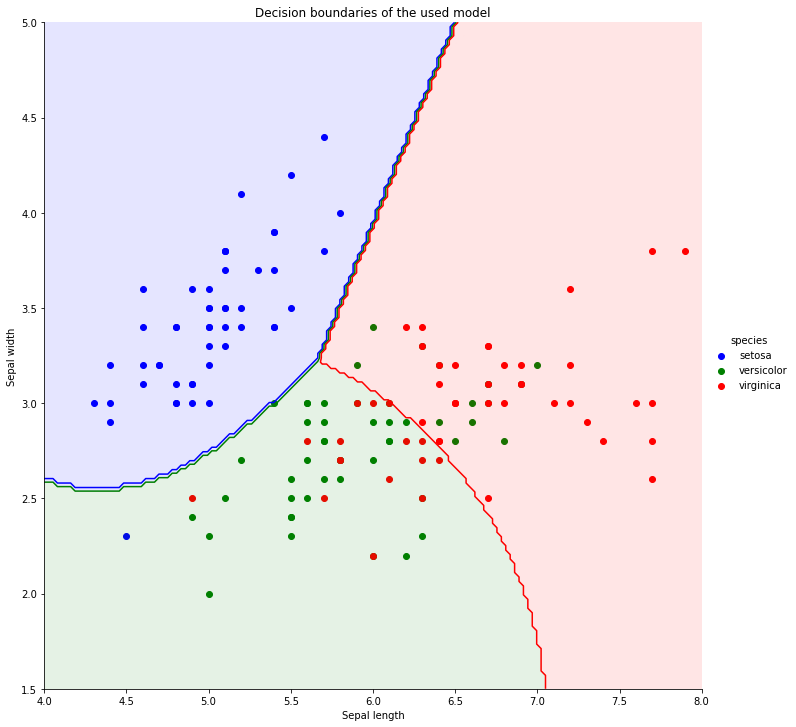

LR Accuracy over the datset:  0.8133333333333334
LR Decision Boundry: 


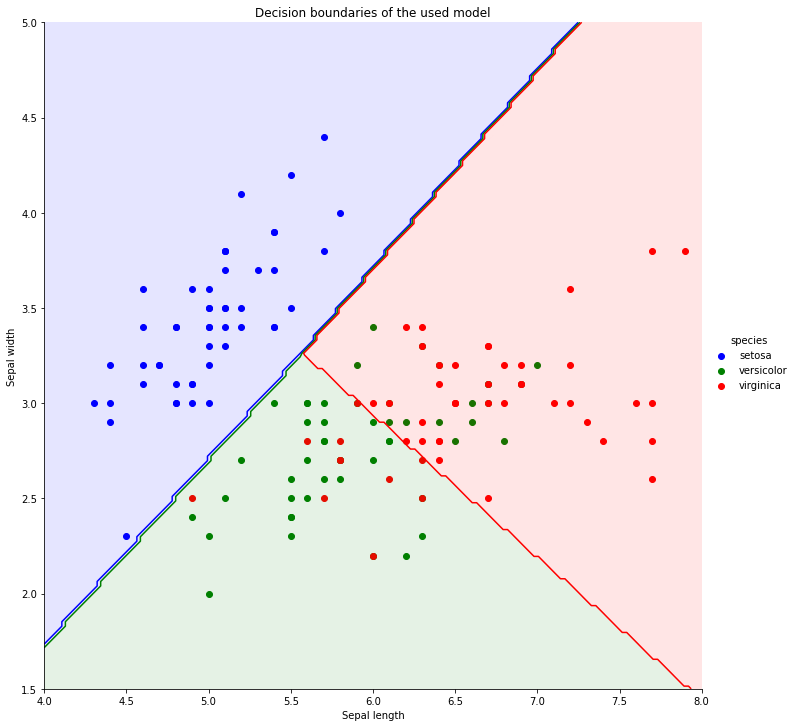

##################
Training using  96  examples
NB Accuracy over the datset:  0.7733333333333333
NB Decision Boundry: 


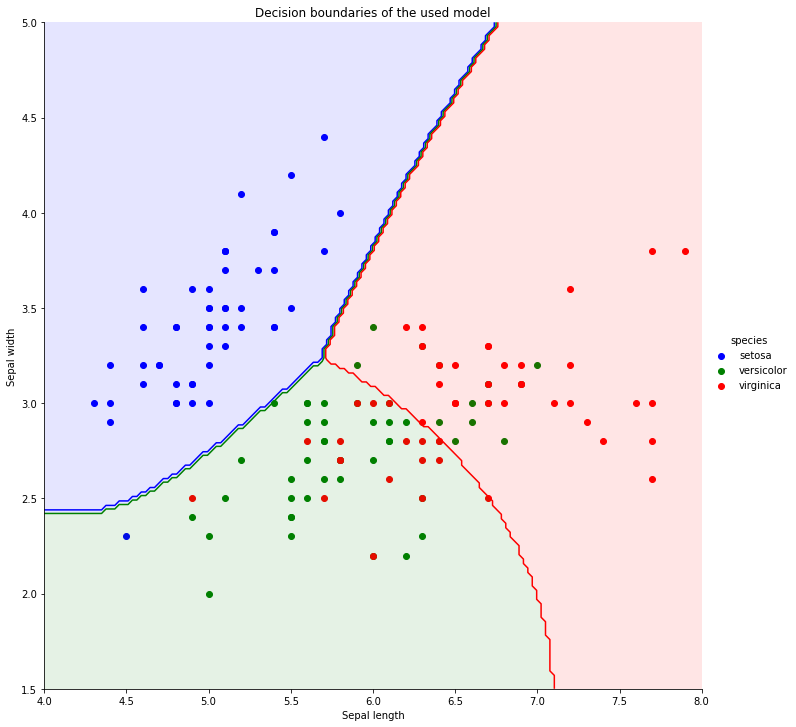

LR Accuracy over the datset:  0.8066666666666666
LR Decision Boundry: 


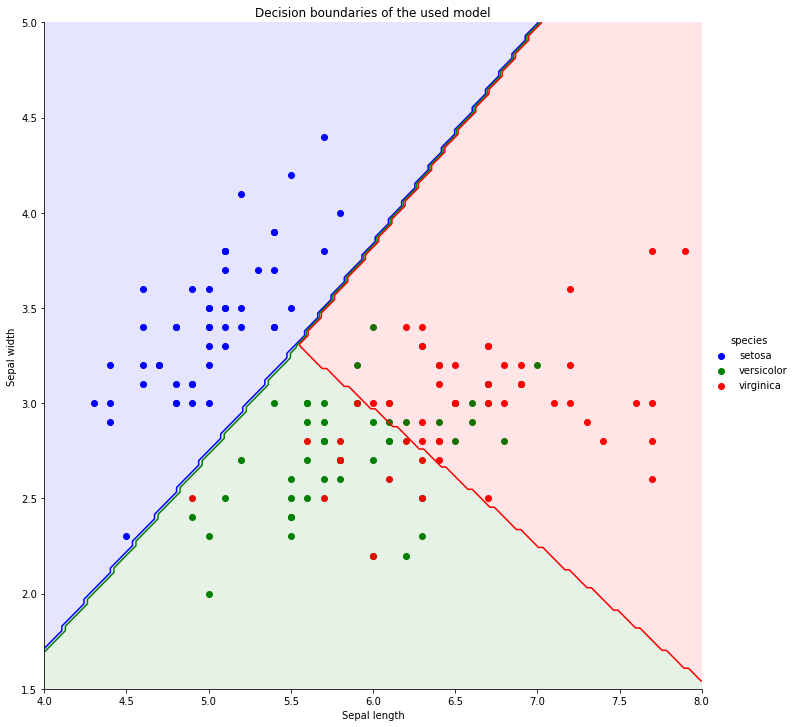

##################
Training using  108  examples
NB Accuracy over the datset:  0.7666666666666667
NB Decision Boundry: 


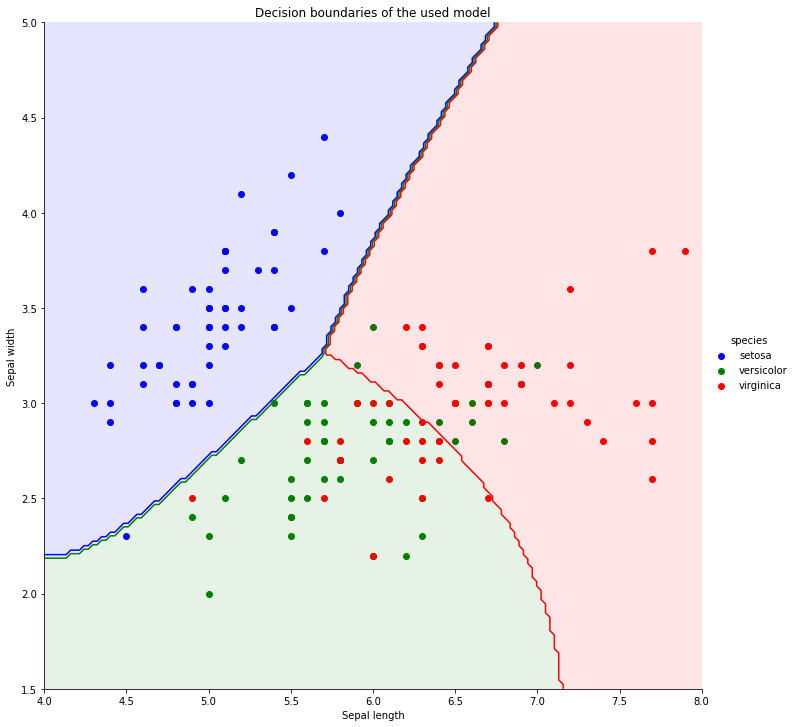

LR Accuracy over the datset:  0.8133333333333334
LR Decision Boundry: 


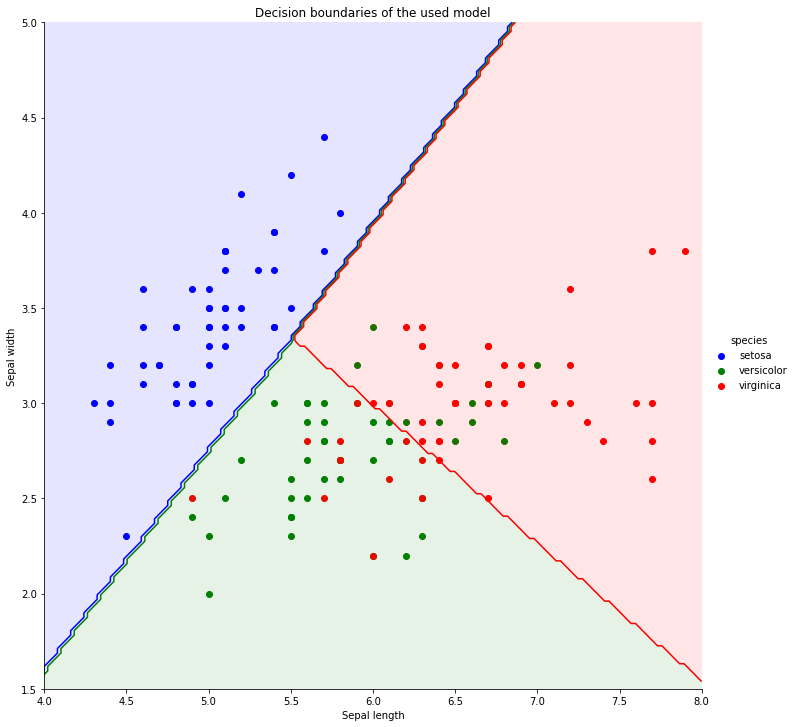

##################
Training using  120  examples
NB Accuracy over the datset:  0.7666666666666667
NB Decision Boundry: 


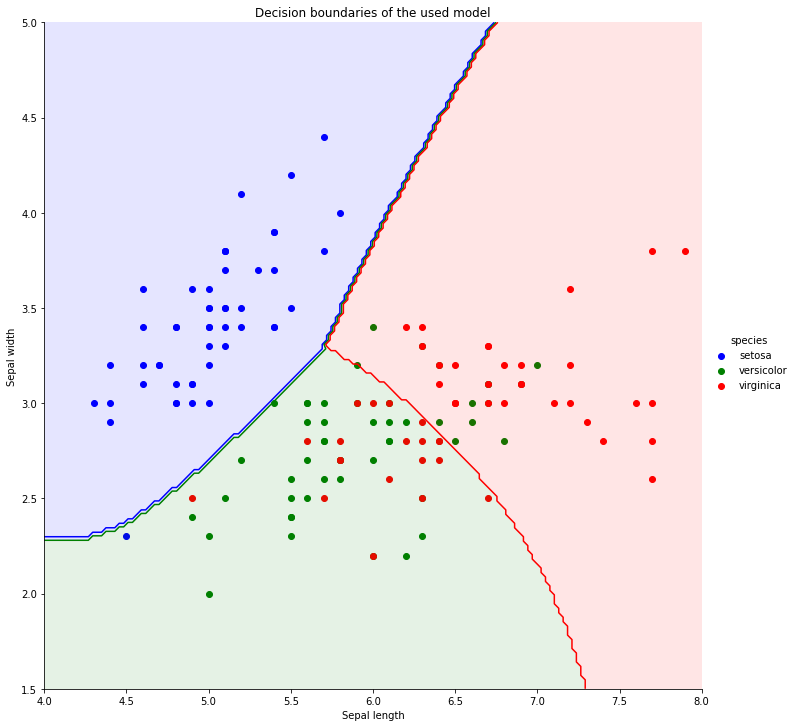

LR Accuracy over the datset:  0.8066666666666666
LR Decision Boundry: 


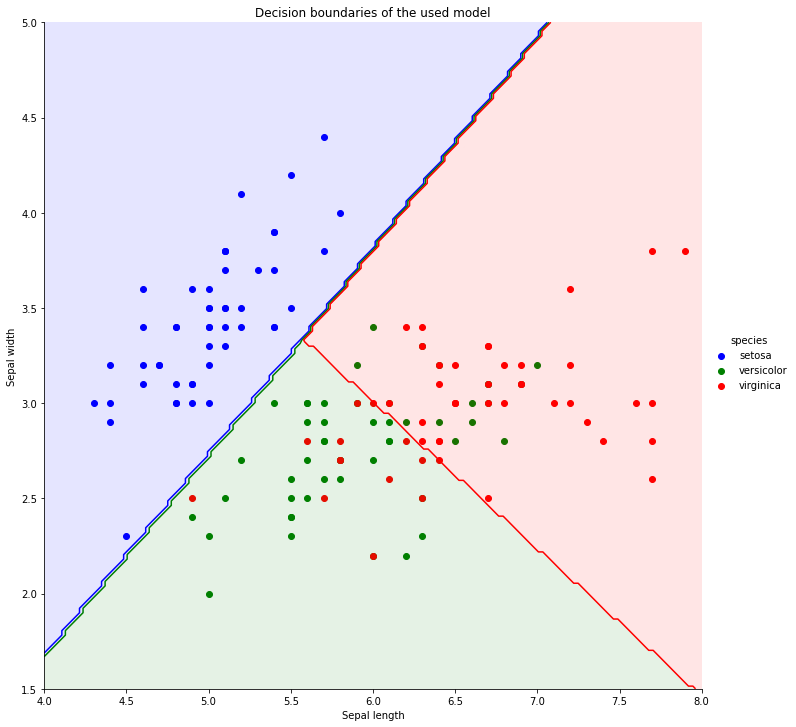

##################


In [ ]:
number_of_training_examples = [3,9,12, 24, 36, 48, 60, 72, 84, 96, 108, 120]
accuracies = {'Naive Bayes':[],'Logistic Regression': []}
for num_examples in number_of_training_examples:

  print('Training using ', num_examples, ' examples')
  X_train_choices, y_train_choices = select_data(X_data, y_labels, num_per_class= int(num_examples/3))

  model_NB = GaussianNB(priors = None)
  model_NB.fit(X_train_choices,y_train_choices)
  print('NB Accuracy over the datset: ',model_NB.score(X_data,y_labels))
  accuracies['Naive Bayes'].append(model_NB.score(X_data,y_labels))

  if plot_DB == True:
    print('NB Decision Boundry: ')
    plot_boundry(model_NB)

  model_LR = LogisticRegression(penalty= 'none', multi_class = 'ovr')
  model_LR.fit(X_train_choices, y_train_choices)
  print('LR Accuracy over the datset: ',model_LR.score(X_data,y_labels))
  accuracies['Logistic Regression'].append(model_LR.score(X_data,y_labels))

  if plot_DB == True:
    print('LR Decision Boundry: ')
    plot_boundry(model_LR)

  print('##################')

# Comparison Plot

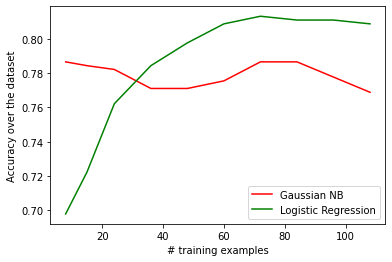

In [ ]:
# Plotting the performance of each training approach(accuracy) vs. number of examples used for training (full training is done for each # of examples)

fig, ax = plt.subplots()


## np.convolve is used to smooth the curve
NB_line, = ax.plot(np.convolve(number_of_training_examples,[1/3,1/3,1/3],'valid'),np.convolve(accuracies['Naive Bayes'],[1/3,1/3,1/3],'valid'),color = 'r')  ## 
NB_line.set_label('Gaussian NB')

LR_line, = ax.plot(np.convolve(number_of_training_examples,[1/3,1/3,1/3],'valid'),np.convolve(accuracies['Logistic Regression'],[1/3,1/3,1/3],'valid'), color = 'g')
LR_line.set_label('Logistic Regression')


ax.legend()
ax.set_ylabel('Accuracy over the dataset')
ax.set_xlabel('# training examples')
plt.show()